In [7]:
import pandas as pd

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [8]:
import re

# Collect labels
df['product_category_tree'] = df['product_category_tree'].apply(
    lambda x: re.split(' >>', x[2:]))
df['product_category_tree'] = df['product_category_tree'].apply(lambda x: x[0])

df['product_category_tree'].value_counts()

Computers                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Baby Care                     150
Home Furnishing               150
Beauty and Personal Care      150
Name: product_category_tree, dtype: int64

In [263]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

df['loaded_images'] = df['image'].apply(
    lambda x: load_img('../P6/Images/' + x, target_size=(224, 224)))

C:\Users\DrDjekyl\anaconda3\lib\site-packages\PIL\Image.py:2847: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


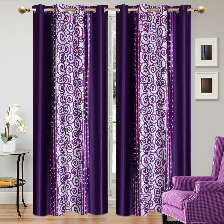

In [265]:
df['loaded_images'][0]

In [273]:
df['array_images'] = df['loaded_images'].apply(
    lambda x: img_to_array(x))

In [274]:
df['reshape_images'] = df['array_images'].apply(
    lambda img: img.reshape((1, img.shape[0], img.shape[1], img.shape[2])))

In [275]:
df['processed_images'] = df['reshape_images'].apply(
    lambda x: preprocess_input(x))

In [9]:
from keras.applications.vgg16 import VGG16

model = VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 6s 0us/step


In [1]:
from keras.applications.vgg16 import VGG16

modelex = VGG16()
modelex.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
output_predictions = dict()

for idx, rows in df.iterrows():
    output_predictions[idx] = model.predict(df['processed_images'][idx])

In [11]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels

for item, output_value in output_predictions.items():
    output_predictions[item] = decode_predictions(output_value)
# retrieve the most likely result, e.g. highest probability

for item, output_value in output_predictions.items():
    output_predictions[item] = output_value[0][0]

40960/35363 [==================================] - 0s 0us/step


In [12]:
results = dict()

for item, output_value in output_predictions.items():
    results[item] = (output_value[1], output_value[2]*100)

In [13]:
results = pd.Series(results)
results = results.to_list()
results = pd.DataFrame(results, index=df.index)
a = results[0].value_counts().head(50)

In [14]:
import numpy as np

results = pd.pivot_table(results, values=1, columns=0, aggfunc=np.mean).T
results = pd.concat([a, results], axis=1).head(50)

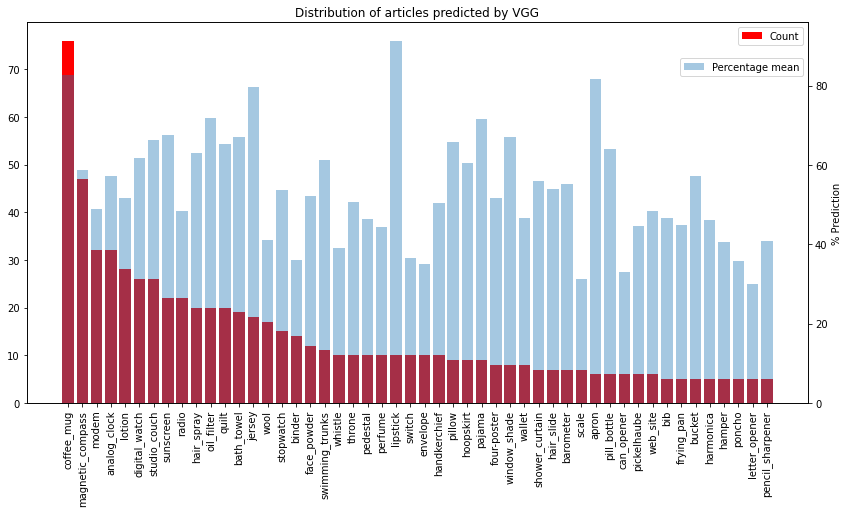

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Title
plt.title('Distribution of articles predicted by VGG')

# PLot 1, command per days
lns1 = ax1.bar(results.index, results[0], color='r', label='Count')

# PLot 2, money per days
lns2 = ax2.bar(results.index, results[1], alpha=0.4, label='Percentage mean')

# added legend
lns = lns1 + lns2
labs = [lns1.get_label(), lns2.get_label()]
ax1.legend()
ax2.legend(bbox_to_anchor=(-0.1, 1.02, 1.1, -0.1))

# Param
plt.ylabel('% Prediction')

ax1.set_xticklabels(results.index, rotation=90)
plt.show()

In [17]:
import numpy as np

X = np.concatenate([i for i in df['processed_images']])
X.shape

(1050, 224, 224, 3)

In [18]:
y = pd.get_dummies(df['product_category_tree'])
y.shape

(1050, 7)

In [16]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [19]:
from sklearn import model_selection

# Split data in train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=0)

In [21]:
from keras import optimizers

opt = optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

# Entraîner sur les données d'entraînement (X_train, y_train)
m = model.fit(x_train, y_train, epochs=7, batch_size=135, verbose=2)

Epoch 1/7
 - 372s - loss: 4.4491 - accuracy: 0.7143
Epoch 2/7
 - 379s - loss: 1.2836 - accuracy: 0.8653
Epoch 3/7
 - 386s - loss: 0.4140 - accuracy: 0.9347
Epoch 4/7
 - 373s - loss: 0.0975 - accuracy: 0.9823
Epoch 5/7
 - 381s - loss: 0.0327 - accuracy: 0.9905
Epoch 6/7
 - 381s - loss: 9.0310e-04 - accuracy: 1.0000
Epoch 7/7
 - 376s - loss: 0.0015 - accuracy: 1.0000


In [22]:
# Score sur le test set
model.evaluate(x_test, y_test)

315/315 [==============================] - 169s 535ms/step


[6.017616155412462, 0.7333333492279053]

In [23]:
vgg2 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = Flatten()(vgg2.output)

# Nouveau modèle
model2 = Model(inputs=vgg2.input, outputs=x)

# Afficher
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [27]:
features = pd.DataFrame(model2.predict(X))

In [1]:
import pandas as pd

features = pd.read_csv('features.csv')
features.drop(columns='Unnamed: 0', inplace=True)

In [2]:
features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.0,0.0,11.387655,0.0,0.0,0.0,0.0,0.0,...,0.000000,56.457676,0.0,0.0,30.503433,23.30275,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.554683,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0


In [3]:
from sklearn import decomposition

n_components = 400

pca = decomposition.PCA(n_components=n_components)
reduced = pca.fit_transform(features)

print(pca.explained_variance_ratio_.sum())

0.8015091064599627


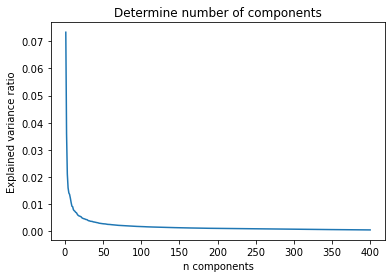

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(1, n_components + 1), pca.explained_variance_ratio_)

plt.title('Determine number of components')
plt.xlabel('n components')
plt.ylabel('Explained variance ratio')

plt.show()

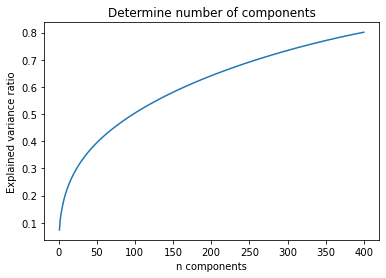

In [5]:
plt.plot(np.arange(1, n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

plt.title('Determine number of components')
plt.xlabel('n components')
plt.ylabel('Explained variance ratio')

plt.show()

In [12]:
from sklearn.cluster import KMeans, MiniBatchKMeans

distortions = list()

K = np.arange(1, 10, 1)

for k in K:
    # Initiate a model for each cluster
    model = KMeans(n_clusters=k, random_state=0, init='k-means++')
    # Stock the results of each cluster
    model.fit(tSNE_res)
    # Obtain disto to plot results
    distortions.append(model.inertia_)

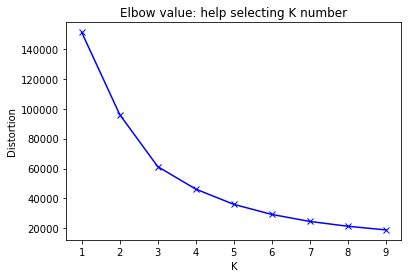

In [145]:
# Plot the results
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(df['product_category_tree'])

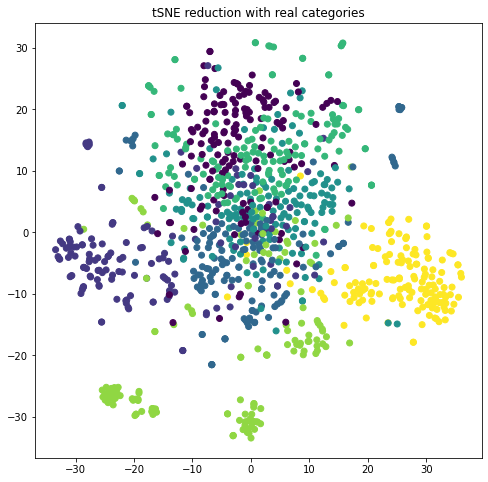

In [15]:
from sklearn.manifold import TSNE
from sklearn import metrics

tSNE_res = TSNE(n_components=2,
                perplexity=45,
                early_exaggeration=12,
                n_iter=2000,

               ).fit_transform(reduced)

# Plot tSNE
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=target)
plt.title('tSNE reduction with real categories')
plt.show()

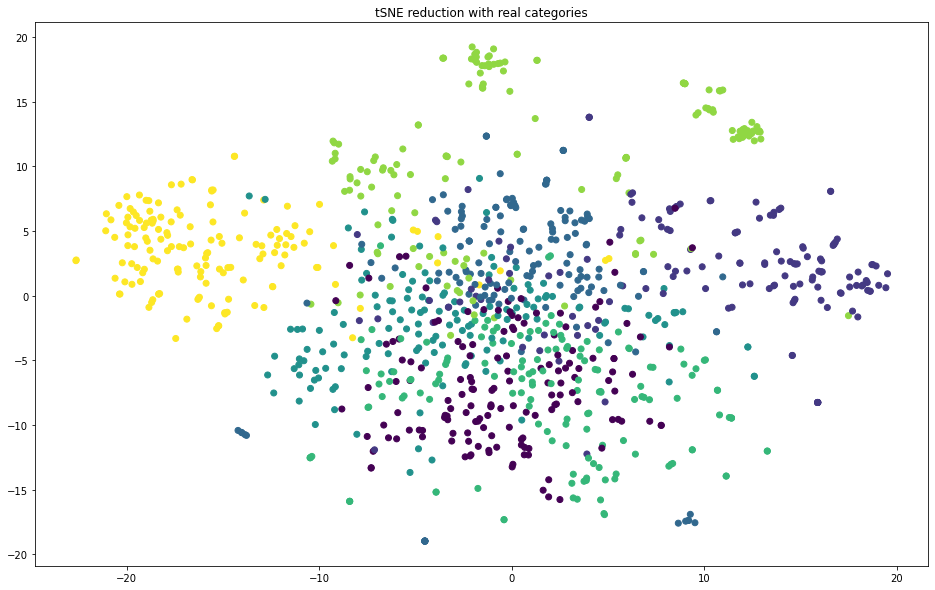

In [136]:
tSNE_res = TSNE(n_components=2,
                perplexity=80,
                early_exaggeration=3,
                n_iter=2000,
                learning_rate=500
               ).fit_transform(reduced)

# Plot tSNE
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ax.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=target)
plt.title('tSNE reduction with real categories')

plt.show()

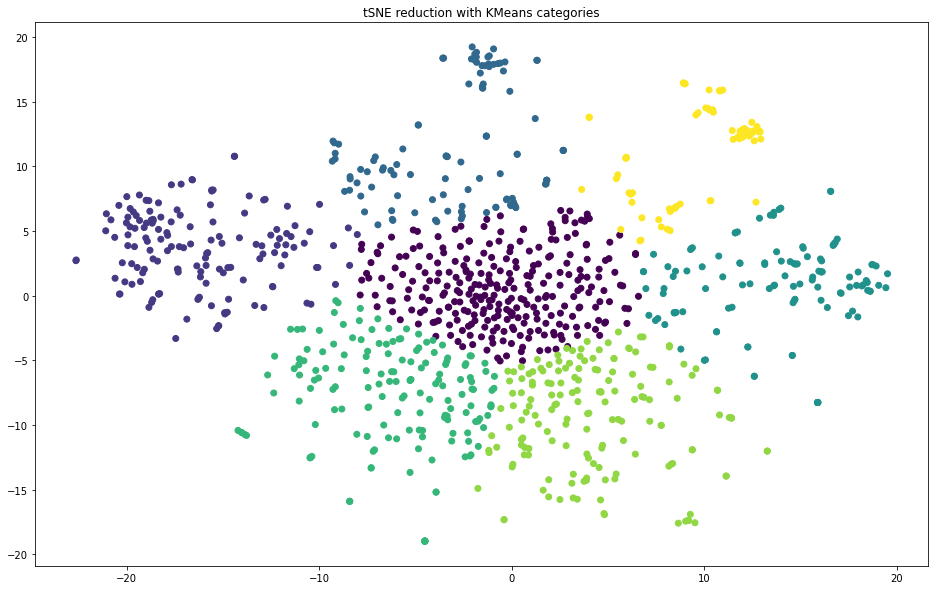

Silhouette Coefficient: 0.391
Davies Bouldin score: 0.803


In [152]:
from sklearn import metrics

kmeans = KMeans(n_clusters=7, init='k-means++').fit(tSNE_res)
y_pred = kmeans.predict(tSNE_res)

fig = plt.figure(figsize=(16, 10))
plt.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=y_pred)
plt.title('tSNE reduction with KMeans categories')

plt.show()

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tSNE_res, kmeans.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(tSNE_res, kmeans.labels_))

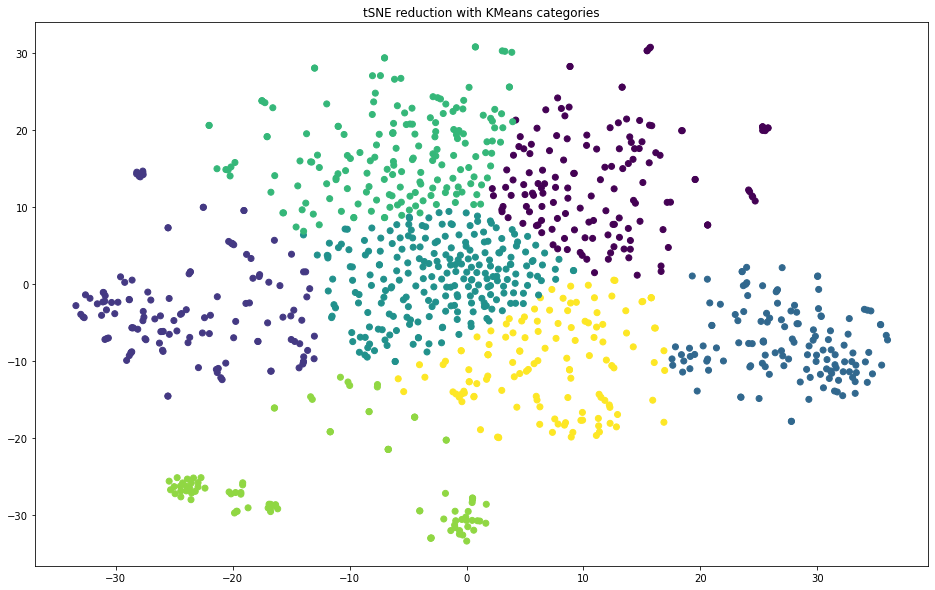

Silhouette Coefficient: 0.389
Davies Bouldin score: 0.817


In [16]:
from sklearn import metrics

kmeans = KMeans(n_clusters=7, init='k-means++').fit(tSNE_res)
y_pred = kmeans.predict(tSNE_res)

fig = plt.figure(figsize=(16, 10))
plt.scatter(tSNE_res[:, 0], tSNE_res[:, 1], c=y_pred)
plt.title('tSNE reduction with KMeans categories')

plt.show()

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tSNE_res, kmeans.labels_))

print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(tSNE_res, kmeans.labels_))

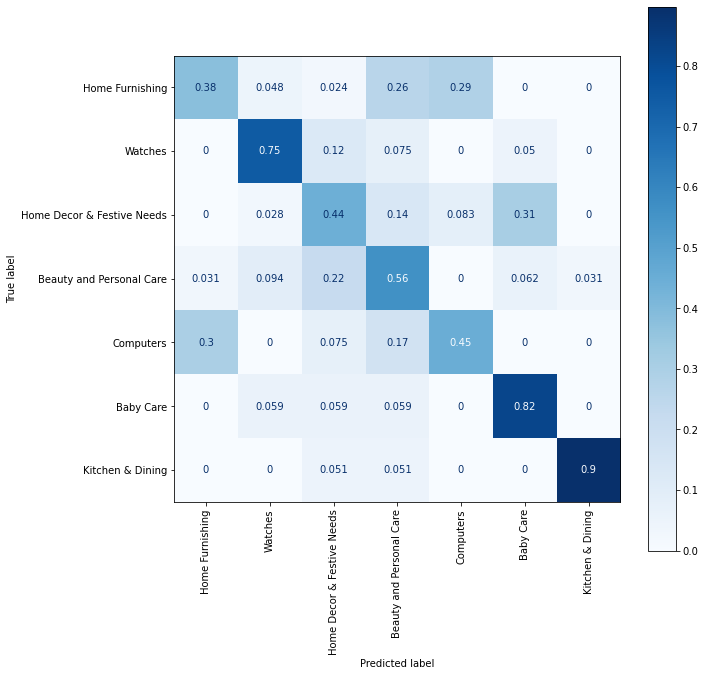

In [241]:
from sklearn import svm
from sklearn.model_selection import train_test_split

k = pd.Series(kmeans.labels_)
t = pd.Series(target)
labels = df['product_category_tree'].value_counts().index

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(tSNE_res,
                                                    t,
                                                    random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(classifier,
                              X_test,
                              y_test,
                              display_labels=labels,
                              cmap=plt.cm.Blues,
                              xticks_rotation='vertical',
                              ax=ax,
                              normalize='true')
disp.ax_.set_title('Confusion matrix')

plt.show()

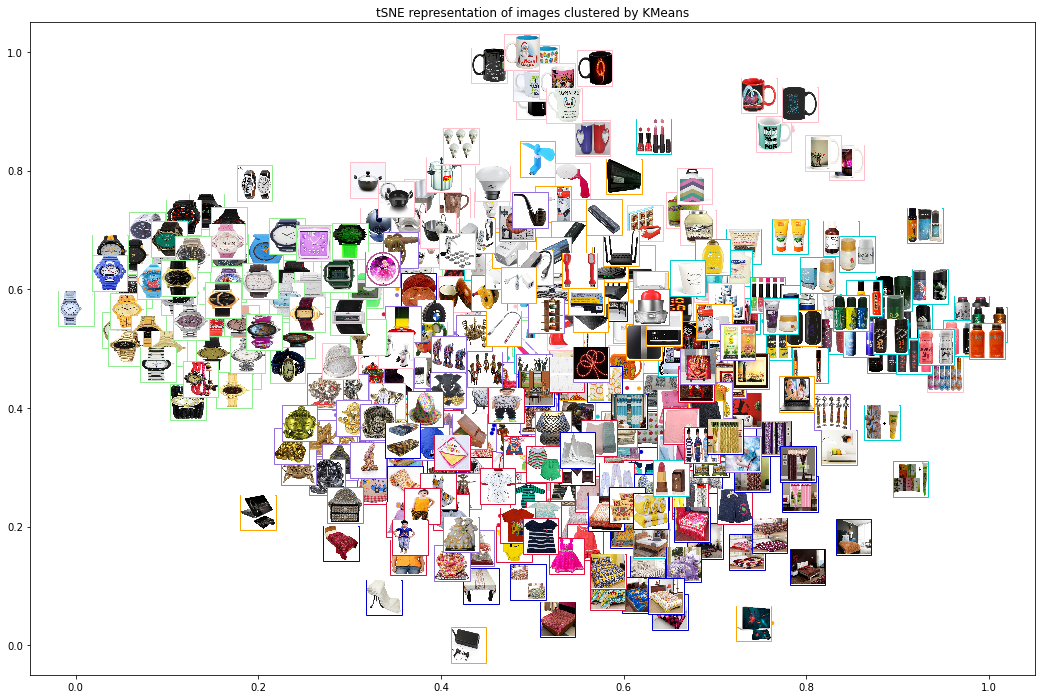

In [294]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Collect some color variables in iterators
color_dict = dict()
i = 0
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Set the color for categories
for categories in df['product_category_tree'].unique().tolist():
    color_dict[categories] = color_list[i]
    i += 1

# Set the color to images
color = df['product_category_tree'].apply(lambda x: dict_color[x])

# Normalize tSNE results between 0 and 1
tSNE_norm = (tSNE_res - np.min(tSNE_res, 0)) / \
    (np.max(tSNE_res, 0) - np.min(tSNE_res, 0))

# Properties of the plot
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
ax.scatter(tSNE_norm[:, 0], tSNE_norm[:, 1], marker='.', c=color)

# Define characteristics to display images in the shown images
shown_images = np.array([[1., 1.]])
for i in range(tSNE_norm.shape[0]):
    dist = np.sum((tSNE_norm[i] - shown_images) ** 2, 1)
    if np.min(dist) < 7e-4:
        continue
    shown_images = np.r_[shown_images, [tSNE_norm[i]]]
    props = {'boxstyle': 'square, pad=0.1', 'edgecolor': color[i]} #rect
    imagebox = AnnotationBbox(OffsetImage(
        df['loaded_images'][i], zoom=0.15), tSNE_norm[i], bboxprops=props)

    ax.add_artist(imagebox)
    ax.set_title('tSNE representation of images clustered by KMeans')

plt.show()